# Search Based Software Engineering
## Exercise 01 - Traveling Salesman Problem Introduction
### by André Karge - andre.karge@uni-weimar.de
(Based on the exercise of Anne Peter)

The Traveling Salesman Problem (TSP) is given by the following question: *“Given is a list of cities and distances between each pair of cities - what is the shortest route that visits each city and returns to the original city?”*

The TSP is an **NP-Hard-Problem** which does not mean an instance of the  problem will be hard to solve. It means, there does not exist an algorithm that produces the best solution in polynomial time. We can not make predictions about how long it might take to find the best solution. But, we can find a good solution which might not be the best solution. It is ok to find a route amongst 1000 cities that is only few miles longer than the best route. Particularly, if it would take an inordinate amount amount of computing time to get from our good solution to the best solution.

![germany TSP](./TSP_Deutschland_3.png)

## Representation of the Problem

<img src="./Graph_TSP.png" align="left">
A TSP can be modelled as an undirected weighted graph:
        - cities = vertices
        - paths between cities = edges
        - distance of a path = weight of an edge
<!--![graph](./Graph_TSP.png)-->

This graph can be represented as an **Adjacency matrix**:


|        | A     | B     | C     | D     |
| :----: | :---: | :---: | :---: | :---: |
| **A**  |  0    | 20    | 42    | 35    |
| **B**  | 20    | 0     | 30    | 34    |
| **C**  | 42    | 30    | 0     | 12    |
| **D**  | 35    | 34    | 12    | 0     |

## Introduction

Euclidean distance between two points p<sub>1</sub> = (x<sub>1</sub>, y<sub>1</sub>) and p<sub>2</sub> = (x<sub>2</sub>, y<sub>2</sub>) is:

$d(p_{1},p_{2}) = \sqrt{(x_{1} - x_{2})^2 + (y_{1} - y_{2})^2}$

In [ ]:
from itertools import permutations

def distance(p1, p2):
    """
    Returns the Euclidean distance of two points in the Cartesian Plane.

    >>> distance([3,4],[0,0])
    5.0
    
    """
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) ** 0.5

In [28]:
print(distance([3,6],[7,6]))

4.0


In [29]:
def total_distance(points):
    """
    Returns the length of the path passing throught
    all the points in the given order.

    >>> total_distance([[1,2],[4,6]])
    5.0
    >>> total_distance([[3,6],[7,6],[12,6]])
    9.0
    """
    return sum([distance(point, points[index + 1]) for index, point in enumerate(points[:-1])])

- keep in mind that \[:-1\] means "all elements if the list without the last"
- *enumerate* is a function to enumerate all elements of a given sequence

In [30]:
# enumerate example
seasons = ['spring', 'summer', 'fall', 'winter']
print(list(enumerate(seasons)))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]


In [31]:
def traveling_salesman(points, start = None):
    """
    Finds the shortest route to visit all the cities by bruteforce.
    Time complexity is O(N!), so never use on long lists.

    >>> travelling_salesman([[0,0],[10,0],[6,0]])
    ([0, 0], [6, 0], [10, 0])
    >>> travelling_salesman([[0,0],[6,0],[2,3],[3,7],[0.5,9],[3,5],[9,1]])
    ([0, 0], [6, 0], [9, 1], [2, 3], [3, 5], [3, 7], [0.5, 9])
    """
    if start is None:
        start = points[0]
    return min([perm for perm in permutations(points) if perm[0] == start], key = total_distance)

- *permutations* returns tuples with all possible orderings without repeat
- function returns minimum of all possible tuples by the help of the function *total_distance* from above

In [32]:
import datetime
def main():
    points = [
        [0, 0],
        [1, 5.7],
        [2, 3],
        [3, 7],
        [0.5, 9],
        [3, 5],
        [9, 1],
        [10, 5],
        [20, 5],
        [12, 12],
        [20, 19],
        [25, 6],
        [23, 7]
    ]
    
    points = points[:-5]
    #points = points[:-4]
    #points = points[:-3]
    #points = points[:-2]
              
    
    then = datetime.datetime.now()
    result = traveling_salesman(points)
    distance_result = total_distance(result)
    now = datetime.datetime.now()
    print("calculation time", now - then)
    print("""
    The minimum distance to visit all 
    of the following points:\n
    {0}
    
    starting at
    {1} is {2} and takes this
    route:
    {3}""".format(
        points,
        points[0],
        distance_result,
        result))

if __name__ == "__main__":
    main()

calculation time 0:00:00.047521

    The minimum distance to visit all 
    of the following points:

    [[0, 0], [1, 5.7], [2, 3], [3, 7], [0.5, 9], [3, 5], [9, 1], [10, 5]]
    
    starting at
    [0, 0] is 25.90302275027582 and takes this
    route:
    ([0, 0], [2, 3], [3, 5], [1, 5.7], [0.5, 9], [3, 7], [10, 5], [9, 1])


## Solving TSP with Hill Climbing

#### Recap: Hill Climbing

Idea:
- use only your local solution and evaluate your 
neighbors to find a better one
- repeat this step until no better neighbor exists

Pros:
- requires few resources (current state and neighbors)
- finds local optimum (global is possible)
- useful if the search space is huge (even unlimited)

Cons:

- is prone to get stuck at the top of local maximum and on plateaus
- strongly depends on “good” initialization

We will use standard Python lists to represent a route through our collection of cities. Each city will simply be assigned to a number from 0 to N-1 where N is the number of cities. Therefore, our list of cities will be a list of uniquie numbers between 0 and N-1

![HC](./HC.jpg)

#### Adjacency Matrix

We also need to specify a "distance matrix" that we can use to keep track of distances between cities. To generate a distance matrix for a set of (x,y) coordinates we will use the following function:

In [33]:
def cartesian_matrix(coordinates):
    '''
    Creates a distance matrix for the city coords using straight line distances
    computed by the Euclidean distance of two points in the Cartesian Plane.
    '''
    matrix = {}
    for i, (x1, y1) in enumerate(coordinates):
        for j, (x2, y2) in enumerate(coordinates):
            dx, dy = x1 - x2, y1 - y2
            distance = (dx ** 2 + dy ** 2) ** 0.5
            matrix[i,j] = distance
    return matrix

This function takes a list of (x,y) tuples and outputs a dictionary that contains the distance between any pair of cities:

In [34]:
m = cartesian_matrix([(0,0), (1,0), (1,1)])
print(m)
print()
print(m[2,0])

{(0, 1): 1.0, (1, 2): 1.0, (0, 0): 0.0, (2, 0): 1.4142135623730951, (1, 0): 1.0, (2, 2): 0.0, (0, 2): 1.4142135623730951, (2, 1): 1.0, (1, 1): 0.0}

1.4142135623730951


\[2,0\] gives the distance between the city with number 2 and the city with  number 0.
In our case the result of \[2,0\] is the same for \[0,2\], but for other TSPs this may not be the case (for example if a street between two cities is only one way - we have to take another route)

#### Read City Coordinates from File

In [35]:
def read_coords(file_handle):
    coords = []
    for line in file_handle:
        x,y = line.strip().split(',')
        coords.append((float(x), float(y)))
    return coords

with open('city100.txt', 'r') as coord_file:
    coords = read_coords(coord_file)
matrix = cartesian_matrix(coords)

On real world problems it may be more complicated to generate a distance matrix - you might need to take a map and calculate the real distances between cities.

#### Compute the Total Distance

In [36]:
def tour_length(matrix, tour):
    """Sum up the total length of the tour based on the distance matrix"""
    result = 0
    num_cities = len(list(tour))
    for i in range(num_cities):
        j = (i+1) % num_cities
        city_i = tour[i]
        city_j = tour[j]
        result += matrix[city_i, city_j]
    return result

#### Implementing Tweak Operators

We will implement the two tweak operators as generator functions that will return all possible versions of a route that can be made in one step of the generator (in a random order).

Generators are iterators which can be only iterated once.
They generate values on the fly and do not store them in memory.
By using a generator function, we can each possiblility and perhaps decide to not generate any more variations.
This saves the overhead of generating all combinations at once.

In [37]:
import random

def all_pairs(size, shuffle = random.shuffle):
    r1 = list(range(size))
    r2 = list(range(size))
    if shuffle:
        shuffle(r1)
        shuffle(r2)
    for i in r1:
        for j in r2:
            yield(i,j) # yield is an iterator function
            # for each call of the generator it returns the next value in yield

In [38]:
from copy import deepcopy

# Tweak 1
def swapped_cities(tour):
    """
    Generator to create all possible variations where two 
    cities have been swapped
    """
    for i,j in all_pairs(len(tour)):
        if i < j:
            copy = deepcopy(tour)
            copy[i], copy[j] = tour[j], tour[i]
            yield copy

# Tweak 2
def reversed_sections(tour):
    """
    Generator to return all possible variations where the
    section between two cities are swapped.
    It preserves entire sections of a route,
    yet still affects the ordering of multiple cities in one go.
    """
    for i,j in all_pairs(len(tour)):
        if i != j:
            copy = deepcopy(tour)
            if i < j:
                copy[i:j+1] = reversed(tour[i:j+1])
            else:
                copy[i+1:] = reversed(tour[:j])
                copy[:j] = reversed(tour[i+1:])
            if copy != tour: # not returning same tour
                yield copy
# usage
for tour in swapped_cities([1,2,3,4]):
    print(tour)
print()
for tour in reversed_sections([1,2,3,4]):
    print(tour)

[1, 2, 4, 3]
[1, 4, 3, 2]
[1, 3, 2, 4]
[4, 2, 3, 1]
[2, 1, 3, 4]
[3, 2, 1, 4]

[3, 4, 2, 1]
[2, 3, 4, 1]
[3, 2, 1, 4]
[4, 3, 2, 1]
[2, 1, 3, 4]
[1, 3, 2, 4]
[1, 4, 3, 2]
[4, 3, 1, 2]
[1, 2, 4, 3]
[4, 1, 2, 3]
[4, 2, 3, 1]


#### Getting Started with Hill Climbing

To start with Hill Climbing, we need two functions:
- init function that returns a random solution
- objective function that tells us how "good" a solution is

For the TSP, an init function will just return a tour of correct length that has cities aranged in random order.

The objective function will return the length of a tour.

We need to ensure that init function takes no arguments and returns a tour of the correct length and the objective function takes one argument (the solution tour) and returns its length.

Assume we have the city coordinates in a variable *coords* and our distance matrix in *matrix*, we can define the objective function and init function by using *init_random_tour*:

In [39]:
def init_random_tour(tour_length):
    tour = list(range(tour_length))
    random.shuffle(list(tour))
    return tour

init_function = lambda: init_random_tour(len(coords))
objective_function = lambda tour: tour_length(matrix, tour)

#### Short Explanation of Lambda Functions
is the creation of an anonymous function
- lambda definition does not include a return statement
- it always contains an expression which is returned
- you can put a lambda definition anywhere a function is expected
- you don't have to assign it to a variable

In [40]:
# normal function definition
def f(x): return x**2

# lambda function definition
g = lambda x: x**2
print(f(5))
print(g(5))

25
25


## Basic Hill Climbing

In [41]:
def hc(init_function, move_operator, objective_function, max_evaluations):
    '''
    Hillclimb until either max_evaluations is 
    reached or we are at a local optima.
    '''
    best = init_function()
    best_score = objective_function(best)
    
    num_evaluations = 1
    
    while num_evaluations < max_evaluations:
        # move around the current position
        move_made = False
        for next in move_operator(best):
            if num_evaluations >= max_evaluations:
                break
            
            next_score = objective_function(next)
            num_evaluations += 1
            if next_score < best_score:
                best = next
                best_score = next_score
                move_made = True
                break # depth first search
        if not move_made:
            break # couldn't find better move - must be a local max
    return (num_evaluations, best_score, best)

In [42]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def create_image(coords, tour, title):
    padding = 20
    # shift all coords in a bit
    coords = [(x+padding,y+padding) for (x,y) in coords]
    maxx, maxy = 0,0
    for x,y in coords:
        maxx = max(x,maxx)
        maxy = max(y,maxy)
    maxx += padding
    maxy += padding
    img = Image.new("RGB",(int(maxx), int(maxy)), color=(255,255,255))
    
    font=ImageFont.load_default()
    d=ImageDraw.Draw(img);
    num_cities = len(tour)
    for i in range(num_cities):
        j = (i+1) % num_cities
        city_i = tour[i]
        city_j = tour[j]
        x1,y1 = coords[city_i]
        x2,y2 = coords[city_j]
        d.line((int(x1), int(y1), int(x2), int(y2)), fill=(0,0,0))
        d.text((int(x1)+7, int(y1)-5), str(i), font=font, fill=(32,32,32))
    
    
    for x,y in coords:
        x,y = int(x), int(y)
        d.ellipse((x-5, y-5, x+5, y+5), outline=(0,0,0), fill=(196,196,196))
    
    d.text((1,1), title, font=font, fill=(0,0,0))
    return img

In [46]:
def do_hc_evaluations(evaluations , move_operator = swapped_cities):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    num_evaluations, best_score, best = hc(init_function, move_operator, objective_function, max_evaluations)
    now = datetime.datetime.now()

    print("computation time ", now - then)
    print(best_score)
    print(best)
    filename = "test"+str(max_evaluations)+".PNG"
    plt.figure(figsize = (10,15))
    img = create_image(coords, best, filename)
    imshow(np.array(img), aspect=1)

computation time  0:00:00.058021
18141.260630696117
[34, 1, 2, 39, 7, 5, 6, 4, 49, 38, 30, 11, 12, 47, 14, 83, 65, 75, 10, 19, 20, 21, 66, 9, 99, 25, 26, 27, 24, 81, 31, 37, 32, 76, 55, 35, 0, 56, 79, 3, 13, 45, 42, 43, 36, 41, 29, 40, 95, 63, 23, 51, 16, 48, 59, 60, 69, 57, 70, 54, 18, 61, 62, 94, 15, 84, 22, 67, 68, 82, 93, 64, 53, 72, 58, 46, 33, 74, 8, 50, 77, 87, 52, 71, 97, 90, 86, 78, 88, 96, 28, 85, 80, 98, 91, 17, 89, 44, 92, 73]


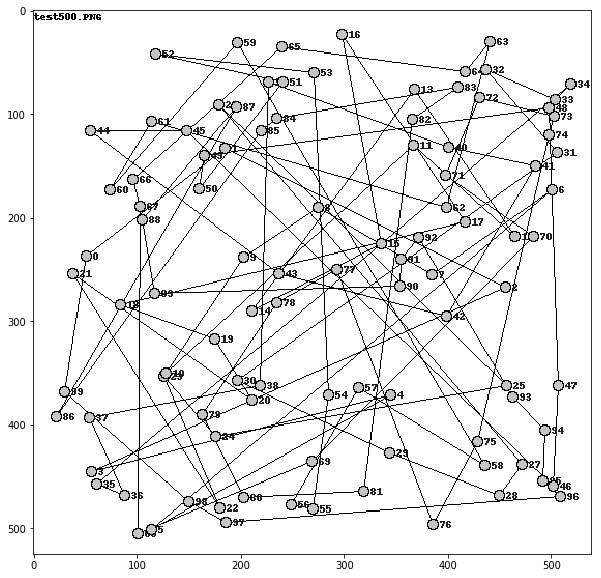

In [47]:
move_operator = swapped_cities
#move_operator = reversed_sections
max_evaluations = 500
do_hc_evaluations(max_evaluations,move_operator)

computation time  0:00:00.528753
8962.243851138317
[54, 97, 52, 49, 8, 77, 44, 66, 56, 73, 86, 34, 21, 88, 67, 61, 63, 38, 43, 20, 30, 50, 19, 14, 11, 37, 53, 55, 76, 6, 2, 81, 46, 70, 4, 13, 71, 28, 42, 7, 60, 69, 82, 99, 10, 96, 23, 1, 51, 3, 84, 26, 41, 22, 18, 36, 16, 48, 47, 58, 94, 32, 15, 65, 9, 0, 39, 35, 68, 5, 92, 45, 72, 95, 80, 74, 59, 57, 89, 29, 17, 98, 25, 85, 83, 90, 78, 31, 79, 87, 33, 24, 27, 91, 40, 93, 12, 75, 62, 64]


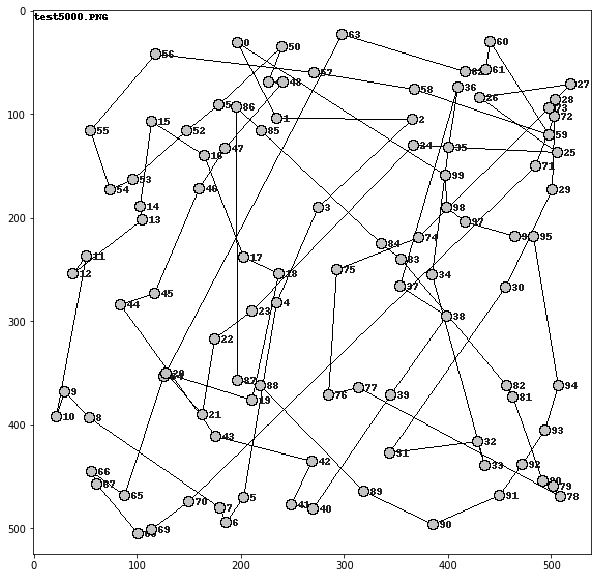

In [48]:
move_operator = swapped_cities
#move_operator = reversed_sections
max_evaluations = 5000
do_hc_evaluations(max_evaluations,move_operator)

computation time  0:00:03.728449
4406.69890910037
[98, 25, 42, 4, 28, 85, 80, 62, 64, 75, 12, 93, 2, 40, 91, 27, 17, 29, 89, 24, 33, 87, 60, 69, 77, 44, 66, 92, 5, 68, 0, 35, 39, 56, 86, 73, 10, 21, 34, 88, 67, 22, 18, 36, 61, 41, 16, 54, 84, 65, 47, 71, 15, 32, 94, 55, 76, 95, 72, 58, 37, 6, 45, 53, 13, 11, 52, 48, 51, 3, 97, 78, 26, 63, 1, 90, 49, 83, 74, 8, 14, 43, 38, 23, 96, 9, 30, 19, 31, 50, 99, 20, 79, 82, 59, 57, 7, 81, 70, 46]


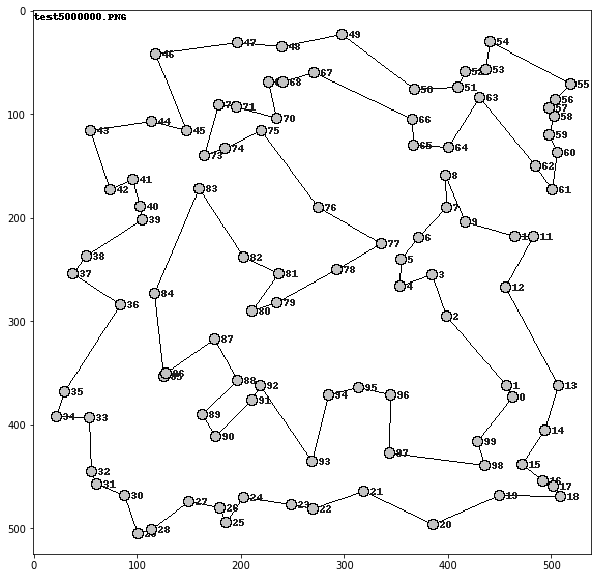

In [49]:
#move_operator = swapped_cities
move_operator = reversed_sections
max_evaluations = 5000000
do_hc_evaluations(max_evaluations,move_operator)

## Steepest Ascent Hill Climbing

In [50]:
def hc_steepest_ascent(init_function, move_operator, objective_function, max_evaluations, num_tweaks):
    '''
    Steepest Ascent Hill Climbing
    '''
    best = init_function()
    best_score = objective_function(best)
    
    num_evaluations = 1
    
    while num_evaluations < max_evaluations:
        if num_evaluations >= max_evaluations:
            break
        move_made = False
        r = next(move_operator(best))
        r_score = objective_function(r)
        for n in range(num_tweaks):
            w = next(move_operator(best))
            w_score = objective_function(w)
            if w_score < r_score:
                r = w
                r_score = w_score
        num_evaluations += 1
        if r_score < best_score:
            best = r
            best_score = r_score
            move_made = True
        if not move_made:
            break
    return (num_evaluations, best_score, best)

In [51]:
def do_hc_steepest_ascent_evaluations(evaluations , move_operator = swapped_cities, num_tweaks = 20):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    num_evaluations, best_score, best = hc_steepest_ascent(init_function,
                                                           move_operator,
                                                           objective_function,
                                                           max_evaluations,
                                                           num_tweaks)
    now = datetime.datetime.now()

    print("computation time ", now - then)
    print(best_score)
    print(best)
    filename = "test"+str(max_evaluations)+".PNG"
    plt.figure(figsize = (10,15))
    img = create_image(coords, best, filename)
    imshow(np.array(img), aspect=1)
    #reload_image_for_jupyter(filename)

computation time  0:00:23.735077
4355.845828077081
[7, 42, 28, 4, 80, 85, 83, 74, 49, 97, 90, 51, 48, 3, 78, 26, 1, 63, 41, 23, 96, 38, 43, 8, 14, 19, 30, 9, 10, 21, 34, 88, 67, 22, 18, 36, 61, 16, 54, 84, 65, 47, 52, 71, 15, 94, 32, 53, 13, 11, 64, 62, 75, 6, 37, 72, 55, 76, 95, 58, 45, 93, 12, 2, 40, 25, 98, 91, 29, 89, 17, 27, 24, 33, 70, 46, 81, 87, 60, 69, 77, 44, 66, 92, 5, 68, 0, 35, 39, 86, 73, 56, 99, 50, 20, 31, 79, 82, 59, 57]


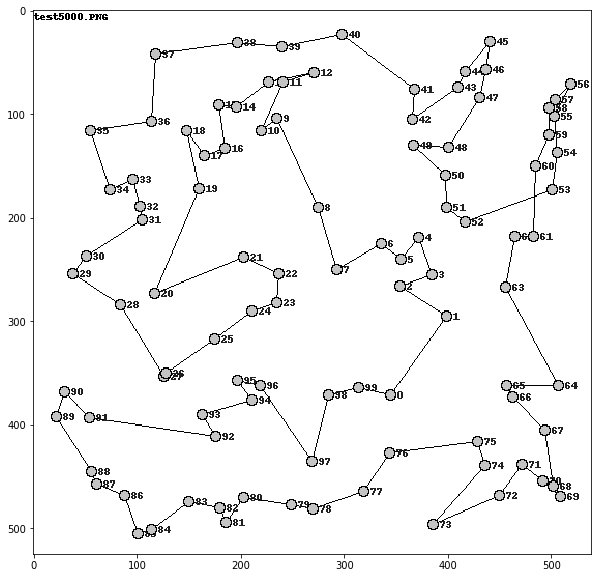

In [53]:
#move_operator = swapped_cities
move_operator = reversed_sections
max_evaluations = 5000
do_hc_steepest_ascent_evaluations(max_evaluations,move_operator,1000)

## Steepest Ascent Hill Climbing with Replacement

In [54]:
def hc_steepest_ascent_wr(init_function, move_operator, objective_function, max_evaluations, num_tweaks):
    '''
    Steepest Ascent Hill Climbing with replacement
    '''
    
    s = init_function()
    s_score = objective_function(s)
    best = s
    best_score = s_score
    
    num_evaluations = 1
    
    while num_evaluations < max_evaluations:
        if num_evaluations >= max_evaluations:
            break
        move_made = False
        r = next(move_operator(s))
        r_score = objective_function(r)
        for n in range(num_tweaks):
            w = next(move_operator(s))
            w_score = objective_function(w)
            if w_score < r_score:
                r = w
                r_score = w_score
        s = r
        s_score = r_score
        num_evaluations += 1
        if s_score < best_score:
            best = s
            best_score = s_score
            move_made = True
        if not move_made:
            break
    return (num_evaluations, best_score, best)

In [55]:
def do_hc_steepest_ascent_wr_evaluations(evaluations , move_operator = swapped_cities, num_tweaks = 20):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    num_evaluations, best_score, best = hc_steepest_ascent_wr(init_function,
                                                              move_operator,
                                                              objective_function,
                                                              max_evaluations,
                                                              num_tweaks)
    now = datetime.datetime.now()

    print("computation time ", now - then)
    print(best_score)
    print(best)
    filename = "test"+str(max_evaluations)+".PNG"
    plt.figure(figsize = (10,15))
    img = create_image(coords, best, filename)
    imshow(np.array(img), aspect=1)
    #reload_image_for_jupyter(filename)

computation time  0:00:24.774437
4226.951187467574
[0, 35, 39, 86, 73, 56, 99, 20, 79, 31, 50, 30, 9, 19, 10, 21, 34, 88, 67, 22, 18, 36, 61, 41, 90, 97, 3, 51, 84, 54, 16, 26, 78, 1, 63, 23, 96, 38, 14, 8, 43, 74, 49, 48, 65, 47, 52, 11, 64, 62, 75, 13, 53, 71, 15, 32, 94, 55, 76, 95, 72, 58, 37, 45, 6, 93, 12, 2, 4, 80, 83, 85, 28, 42, 25, 98, 40, 91, 89, 29, 17, 27, 46, 70, 24, 33, 81, 7, 57, 59, 82, 87, 60, 69, 77, 44, 66, 92, 5, 68]


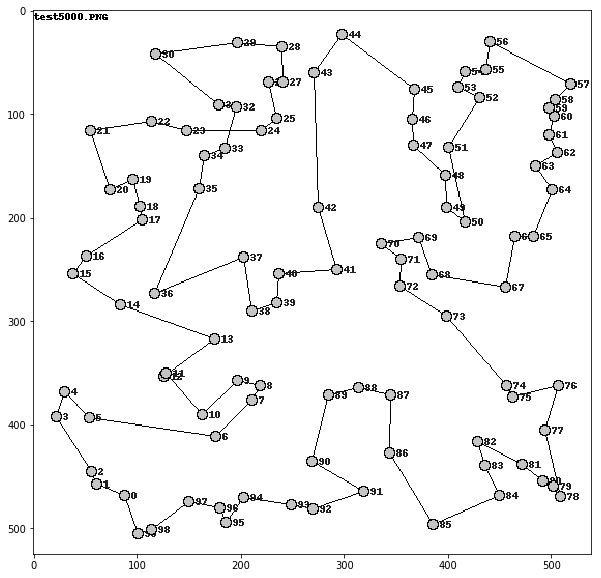

In [57]:
#move_operator = swapped_cities
move_operator = reversed_sections
max_evaluations = 5000
do_hc_steepest_ascent_wr_evaluations(max_evaluations,move_operator,1000)

## Simulated Annealing

In [69]:
import math

def cooling_function(start_temp, alpha):
    # by Kirkpatrick et al.
    T = start_temp
    while True:
        yield T
        T = alpha * T

def switch_probability(temperature, r_score, s_score):
    if r_score < s_score:
        return 1.0
    elif temperature == 0:
        return 0.0
    else:
        return math.exp(-abs(r_score - s_score)/temperature)

class ObjectiveFunction:
    '''
    Class to wrap an objective function and 
    keep track of the best solution evaluated.
    '''
    def __init__(self, objective_function):
        self.objective_function = objective_function
        self.best = None
        self.best_score = None
    def __call__(self, solution):
        score = self.objective_function(solution)
        if self.best is None or score < self.best_score:
            self.best = solution
            self.best_score = score
        return score

def simulated_annealing(init_function, move_operator, objective_function, max_evaluations, start_temp, alpha):
    '''
    Simulated Annealing
    '''
    objective_function = ObjectiveFunction(objective_function)
    
    temperature = cooling_function(start_temp, alpha)
    
    s = init_function()
    s_score = objective_function(s)
    best = s
    best_score = s
    t = next(temperature)
    num_evaluations = 1

    while num_evaluations < max_evaluations:
        if num_evaluations >= max_evaluations:
            break
        r = next(move_operator(s))
        r_score = objective_function(r)
        num_evaluations += 1
        
        if random.random() < switch_probability(t, r_score, s_score):
            s = r
            s_score = r_score
        t = next(temperature)
    best = objective_function.best
    best_score = objective_function.best_score
    return (num_evaluations, best_score, best)

In [66]:
def do_simulated_annealing_evaluations(evaluations , move_operator = swapped_cities, start_temp = 10, alpha = 0.9999):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    num_evaluations, best_score, best = simulated_annealing(init_function,
                                                            move_operator,
                                                            objective_function,
                                                            max_evaluations,
                                                            start_temp,
                                                            alpha)
    now = datetime.datetime.now()

    print("computation time ", now - then)
    print(best_score)
    print(best)
    filename = "test"+str(max_evaluations)+".PNG"
    plt.figure(figsize = (10,15))
    img = create_image(coords, best, filename)
    imshow(np.array(img), aspect=1)
    #reload_image_for_jupyter(filename)

computation time  0:00:23.649240
3955.9723968457542
[60, 69, 77, 44, 66, 92, 5, 68, 0, 35, 39, 86, 73, 56, 9, 30, 50, 99, 20, 79, 31, 19, 96, 10, 21, 34, 88, 67, 22, 18, 36, 16, 61, 41, 63, 23, 1, 26, 78, 90, 97, 51, 3, 54, 84, 48, 65, 47, 52, 11, 13, 53, 71, 15, 32, 94, 55, 76, 95, 72, 58, 37, 45, 6, 93, 12, 2, 42, 4, 75, 64, 62, 80, 83, 85, 28, 74, 49, 38, 43, 8, 14, 59, 57, 7, 25, 98, 40, 91, 89, 29, 17, 27, 46, 70, 24, 33, 81, 87, 82]


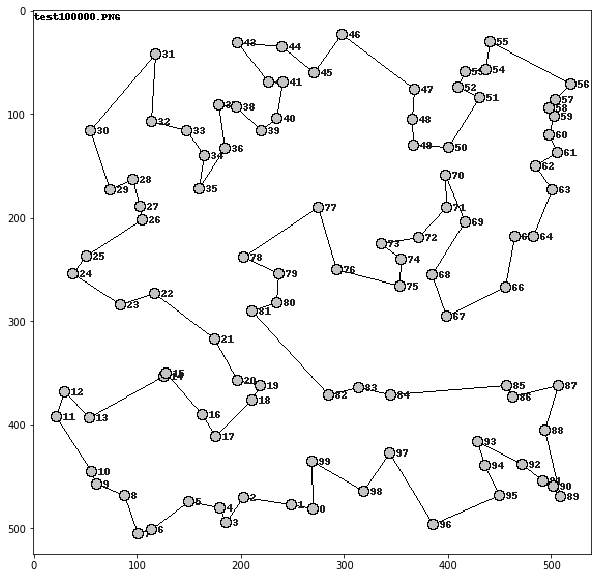

In [72]:
#move_operator = swapped_cities
move_operator = reversed_sections
max_evaluations = 100000
temp = 10
alpha = 0.99995
do_simulated_annealing_evaluations(max_evaluations,move_operator,temp,alpha)

## Tabu Search

In [73]:
from collections import deque

def tabu_search(init_function, move_operator, objective_function, max_evaluations, num_tweaks, tabu_length):
    '''
    Tabu Search
    '''
    objective_function = ObjectiveFunction(objective_function)
    
    s = init_function()
    s_score = objective_function(s)
    best = s
    best_score = s_score
    
    # we use a fifo queue
    l = deque([],tabu_length)
    
    num_evaluations = 1
    
    while num_evaluations < max_evaluations:
        if num_evaluations >= max_evaluations:
            break
        r = next(move_operator(s))
        r_score = objective_function(r)
        num_evaluations += 1
        for n in range(num_tweaks):
            w = next(move_operator(s))
            w_score = objective_function(w)
            if w not in l and (w_score < r_score or r in l):
                r = w
                r_score = w_score
        if r not in l and r_score < s_score:
            s = r
            s_score = r_score
            l.append(r)
    
    best = objective_function.best
    best_score = objective_function.best_score
    return (num_evaluations, best_score, best)

In [74]:
def do_tabu_search_evaluations(evaluations , move_operator = swapped_cities, num_tweaks = 10, tabu_length = 10):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    num_evaluations, best_score, best = tabu_search(init_function,
                                                    move_operator,
                                                    objective_function,
                                                    max_evaluations,
                                                    num_tweaks,
                                                    tabu_length)
    now = datetime.datetime.now()

    print("computation time ", now - then)
    print(best_score)
    print(best)
    filename = "test"+str(max_evaluations)+".PNG"
    plt.figure(figsize = (10,15))
    img = create_image(coords, best, filename)
    imshow(np.array(img), aspect=1)
    #reload_image_for_jupyter(filename)

computation time  0:01:16.236018
4083.868324197697
[87, 60, 69, 77, 44, 66, 92, 5, 68, 0, 35, 39, 56, 86, 73, 21, 34, 10, 96, 30, 9, 31, 19, 14, 8, 43, 74, 85, 83, 49, 38, 23, 88, 67, 22, 18, 36, 16, 61, 41, 63, 1, 26, 78, 90, 97, 51, 3, 54, 84, 48, 65, 47, 52, 11, 13, 53, 71, 15, 32, 94, 55, 76, 95, 72, 58, 37, 45, 6, 93, 12, 75, 64, 62, 80, 4, 28, 42, 2, 25, 98, 40, 91, 89, 29, 17, 27, 46, 70, 24, 33, 81, 7, 57, 59, 79, 20, 50, 99, 82]


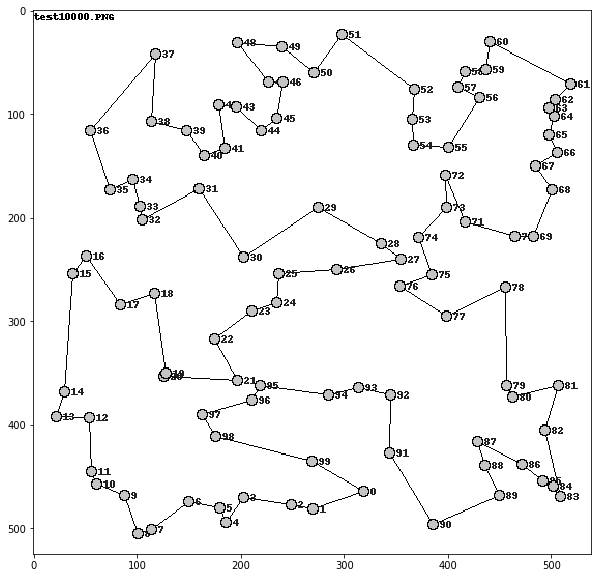

In [78]:
#move_operator = swapped_cities
move_operator = reversed_sections
max_evaluations = 10000
num_tweaks = 30
tabu_length = 100
do_tabu_search_evaluations(max_evaluations,move_operator,num_tweaks,tabu_length)

## Iterated Local Search

In [99]:
def new_home_base(h, s, objective_function):
    # very simple decision
    if objective_function(s) < objective_function(h):
        return s
    else:
        return h

def perturb(h, move_operator, time = 20):
    # slow, but makes a larger tweak which is not so far
    r = next(move_operator(h))
    for t in range(time):
        r = next(move_operator(h))
    return r

def ils(init_function, move_operator, objective_function, max_evaluations, time_distribution, perturb_time):
    """
    Iterated Local Search
    """
    
    objective_function = ObjectiveFunction(objective_function)
    
    s = init_function()
    s_score = objective_function(s)
    
    h = s
    
    num_evaluations = 1
    
    while num_evaluations < max_evaluations:
        max_t = random.choice(time_distribution)
        num_t = 1
        while num_t < max_t:
            r = next(move_operator(s))
            r_score = objective_function(r)
            num_t += 1
            if r_score < s_score:
                s = r
                s_score = r_score
        num_evaluations += 1
        h = new_home_base(h,s, objective_function)
        s = perturb(h, move_operator, perturb_time)
    best = objective_function.best
    best_score = objective_function.best_score
    return (num_evaluations, best_score, best)

In [100]:
def do_ils_evaluations(evaluations , move_operator, time_distribution, perturb_time):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    num_evaluations, best_score, best = ils(init_function,
                                            move_operator,
                                            objective_function,
                                            max_evaluations,
                                            time_distribution,
                                            perturb_time)
    now = datetime.datetime.now()

    print("computation time ", now - then)
    print(best_score)
    print(best)
    filename = "test"+str(max_evaluations)+".PNG"
    plt.figure(figsize = (10,15))
    img = create_image(coords, best, filename)
    imshow(np.array(img), aspect=1)
    #reload_image_for_jupyter(filename)

computation time  0:15:13.403796
4092.578859784606
[60, 69, 77, 44, 66, 92, 5, 68, 0, 35, 39, 86, 73, 56, 9, 30, 50, 99, 31, 79, 20, 82, 59, 57, 7, 42, 28, 4, 80, 85, 83, 74, 43, 38, 8, 14, 19, 96, 10, 21, 34, 88, 67, 22, 18, 36, 16, 61, 41, 63, 23, 1, 26, 78, 90, 49, 97, 51, 3, 54, 84, 48, 65, 47, 52, 11, 53, 71, 15, 32, 94, 55, 76, 95, 72, 58, 37, 6, 45, 13, 64, 62, 75, 12, 93, 2, 25, 98, 40, 91, 27, 17, 29, 89, 24, 70, 46, 33, 81, 87]


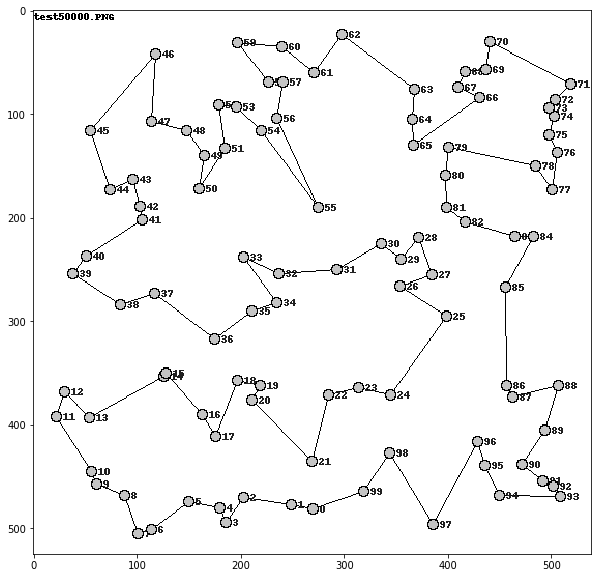

In [101]:
#move_operator = swapped_cities
move_operator = reversed_sections
max_evaluations = 50000
time_distribution = [i for i in range(20,100)]
perturb_time = 20
do_ils_evaluations(max_evaluations,move_operator,time_distribution, perturb_time)